In [1]:
import numpy as np
import pandas as pd
import tensorflow
import keras

Using TensorFlow backend.


In [2]:
!pip install tensorflow

You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# MNIST Dataset

In [3]:
from keras.datasets import mnist

In [4]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [9]:
X_train[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [13]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

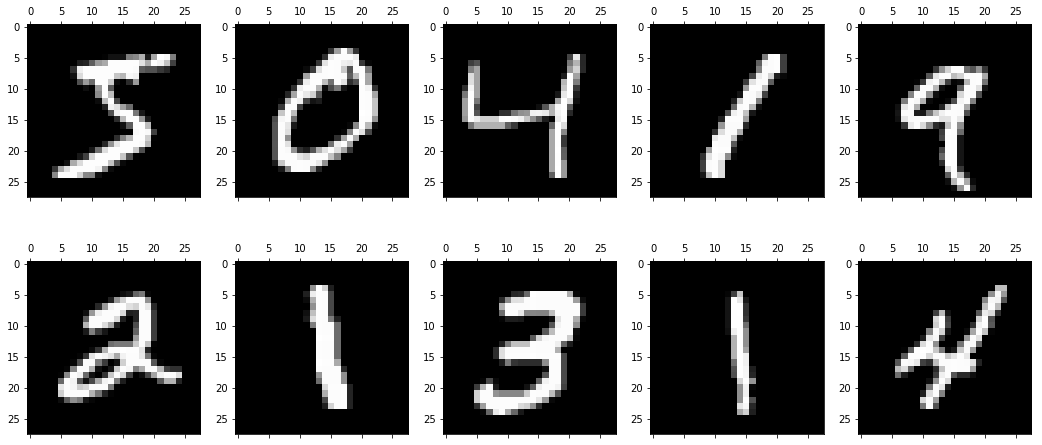

In [6]:
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

# Preprocessing

In [10]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [14]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape)
print(y_test_hot.shape)

(60000, 10)
(10000, 10)


# Define Sigmoid

In [15]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

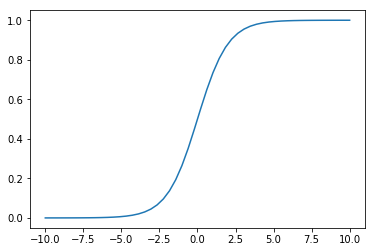

In [17]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

# Define Cross-Entropy

In [20]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)
    
    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)
    
    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

In [21]:
a = cross_entropy([1,0,0,1], [0,1,1,0])

print(a)

34.53917619362578


In [34]:
num_epoch = 300
learning_rate = 0.03
best_accuracy = 0
best_learning_rate = learning_rate

w = np.random.uniform(low=-1.0, high=+1.0, size=(28 * 28, 10))
b = np.random.uniform(low=-1.0, high=+1.0, size=(1, 10))

for epoch in range(num_epoch):
    y_predict_hot = X_train.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    predict = y_predict_hot.argmax(axis=1)
    accuracy = (predict == y_train).mean()
    
    if accuracy > 0.95:
        break
        
    loss = cross_entropy(y_train_hot, y_predict_hot)
    
    if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_w = w
        best_b = b
        
    if epoch % 100 == 0:
        print("{:2} accuracy = {:.6f}, best_accuracy = {:.6f}".format(epoch, accuracy, best_accuracy))
        
    w = w - learning_rate * X_train.T.dot(y_predict_hot - y_train_hot) / X_train.shape[0]
    b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0)
    learning_rate = cross_entropy(y_train_hot, y_predict_hot)

#     print("learning_rate : {:.6f}".format(learning_rate))

print("---" * 10)
print("{:2} result accuracy = {:.6f}".format(epoch, accuracy))

/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 0 accuracy = 0.068167, best_accuracy = 0.068167
100 accuracy = 0.802767, best_accuracy = 0.802767
200 accuracy = 0.822767, best_accuracy = 0.822767
------------------------------
299 result accuracy = 0.832033


In [35]:
y_predict_hot = X_test.dot(best_w) + best_b
y_predict_hot = sigmoid(y_predict_hot)

predict = y_predict_hot.argmax(axis=1)
accuracy = (predict == y_test).mean()

print("accuracy : {}".format(accuracy))

accuracy : 0.8375


/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
